In [1]:
import pandas
# Read data, manipulate your data, select columns, basic stats, check empties.
data = pandas.read_csv("schoolcleaned.csv", parse_dates=['bday','enrolldate', 'expgradate'])
data.head(2)

,Unnamed: 0,ids,bday,enrolldate,expgradate,Rank,Major,Gender,Athlete,Height,...,Math,Writing,State,LiveOnCampus,HowCommute,CommuteTime,SleepTime,StudyTime,Performance,Total
0,0,43783,1995-03-22,2014-08-04,2019-05-13,Unknown,uknown,Male,Non-Athlete,217.05,...,60.02,81.44,In state,On Campus,Other,27.149573,7.0,1.0,Failed,222.96
1,29,20230,1996-01-02,2014-08-04,2020-05-11,Freshmen,pre-pharma,Male,Athlete,240.33,...,65.36,76.07,In state,On Campus,Other,27.149573,8.0,3.0,Failed,217.03


In [2]:
# Seaborn, MatplotLib
import matplotlib.pyplot as plt #This line imports the plotting functionalities from the matplotlib library and assigns them the alias plt
import seaborn as sns   # is a library built on top of matplotlib that provides a higher-level interface for creating statistical graphics.
plt.style.available #This line calls the available function from the plt.style submodule of matplotlib. This function returns a list of available visualization styles that you can use to customize the appearance of your plots.

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [3]:
plt.style.use('ggplot') #use() sets the plotting style for your visualizations 
# ggplot' style typically uses a light grey background for the plot area.
# Grid lines are often displayed in white
# 'ggplot' style might use slightly larger fonts for axis tick labels.

C:\Users\Sarah\AppData\Local\Temp\ipykernel_9560\1200079644.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data['HowCommute'], palette = 'Oranges') #countplot() is a univariante plot


Text(0.5, 0, 'Number of Students')

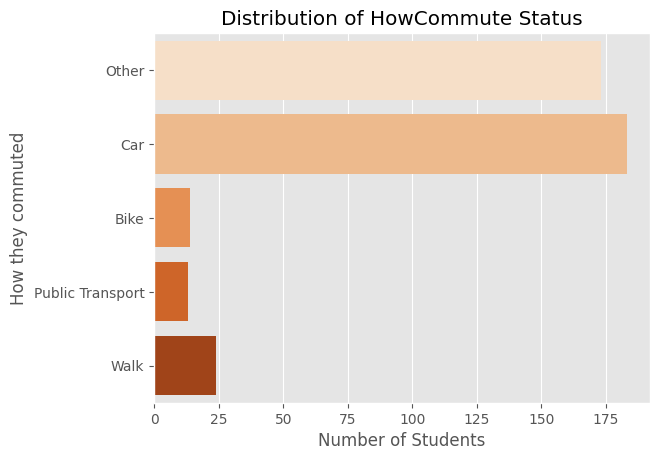

In [4]:
# Univariate analysis: Here, we look at a single variable at a time. Bar Chart, Histogram,Pie Chart
# Bivariate analysis: Here, we look at the relationship between two variables. Scatterplot, Stacked Bar Chart, Box Plot
# Multivariate analysis:  Here, we look at the relationship of more than two variables simultaneously.  Scatterplot Matrix, Heatmap
# Count Plot  - Categorical Variables
sns.countplot(data['HowCommute'], palette = 'Oranges') #countplot() is a univariante plot
plt.title("Distribution of HowCommute Status")
plt.ylabel('How they commuted')
plt.xlabel('Number of Students')

AttributeError: 'int' object has no attribute 'round'

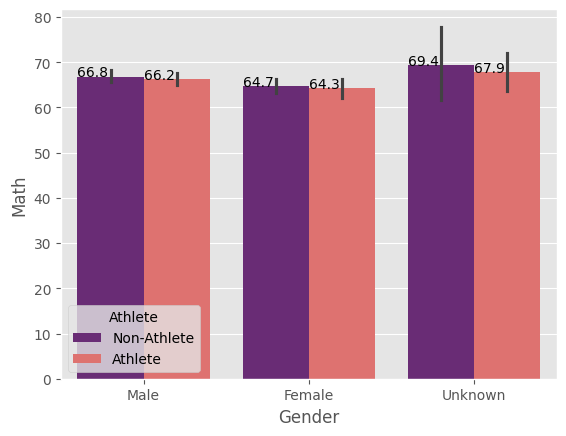

In [5]:
import numpy
# you can use min, max, mean, std, sum, product
# barplot()is a bivariante. it shows the relationship btwn a quantitative datatype and a qualitative datatype.
# ax = sns.barplot(x = 'Gender', y = 'Math', data = data,palette = 'magma')

# using estimator
# ax = sns.barplot(x = 'Gender', y = 'Math', data = data, estimator=numpy.sum,
#             palette = 'magma')

# multivariant we use hue
ax = sns.barplot(x = 'Gender', y = 'Math', data = data, estimator=numpy.mean,palette = 'magma', hue='Athlete')

# adds text labels to the bars at their top positions, displaying the average math score for each gender(loop)
# justpaste.it/arfz6
for p in ax.patches:
  txt = str(p.get_height().round(1)) + ' '
  txt_x = p.get_x()
  txt_y = p.get_height()
  ax.text(txt_x,txt_y,txt)


C:\Users\Sarah\AppData\Local\Temp\ipykernel_9560\3591212466.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data['Sprint'],kde=False,bins=6)


Text(0, 0.5, 'Freq')

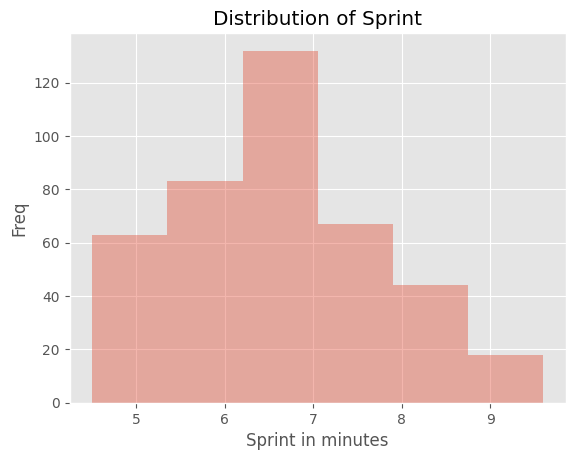

In [6]:
# creates a histogram using Seaborn's distplot function 

ax = sns.distplot(data['Sprint'],kde=False,bins=6)
# kde=False argument specifies that you don't want a kernel density estimation plot (a smooth curve) alongside the histogram.
# ax = sns.distplot(data['Sprint'], kde=False)
# bins=4
plt.title("Distribution of Sprint")
plt.xlabel('Sprint in minutes')
plt.ylabel('Freq')

<Axes: xlabel='Gender', ylabel='Math'>

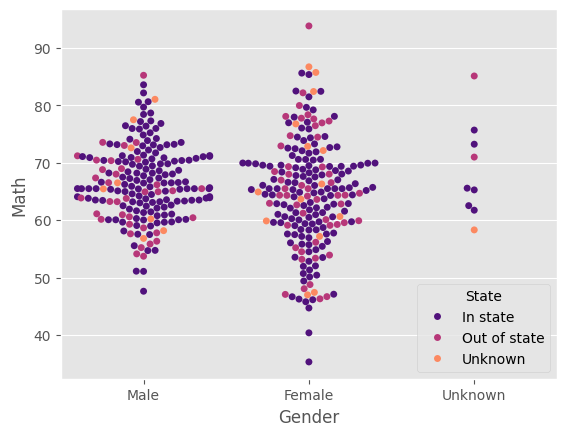

In [7]:
# Swarm
colors = ['#3949AB', '#2E7D32', '#546E7A']
sns.swarmplot(x ='Gender', y ='Math', data = data, palette= 'magma',
              hue ='State')

<Axes: xlabel='Gender', ylabel='Math'>

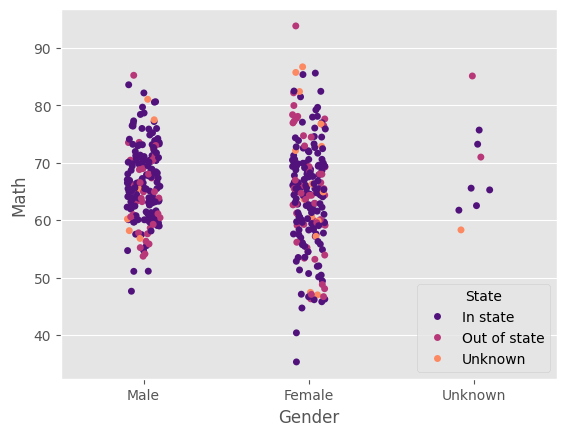

In [8]:
sns.stripplot(x ='Gender', y ='Math', data = data, palette= 'magma',
              hue ='State')

<Axes: xlabel='Gender', ylabel='Math'>

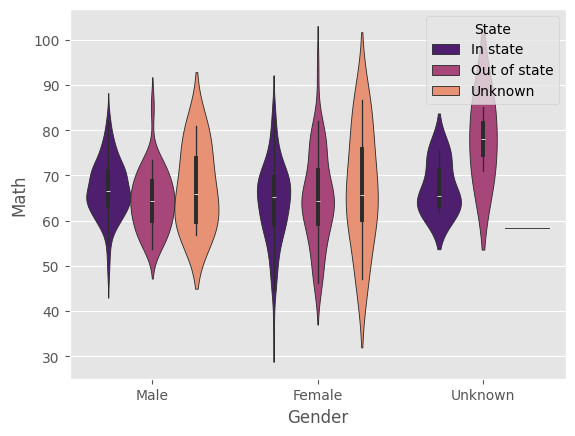

In [9]:
sns.violinplot(x ='Gender', y ='Math', data = data, palette= 'magma',
              hue ='State')

<Axes: xlabel='Math', ylabel='Writing'>

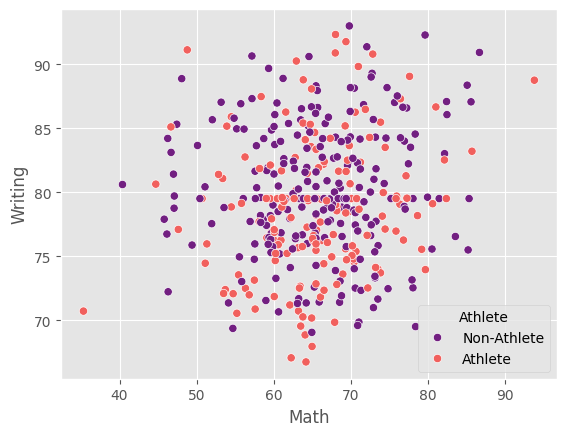

In [10]:
sns.scatterplot(x ='Math', y ='Writing', data = data, palette= 'magma', hue = 'Athlete')

<Axes: >

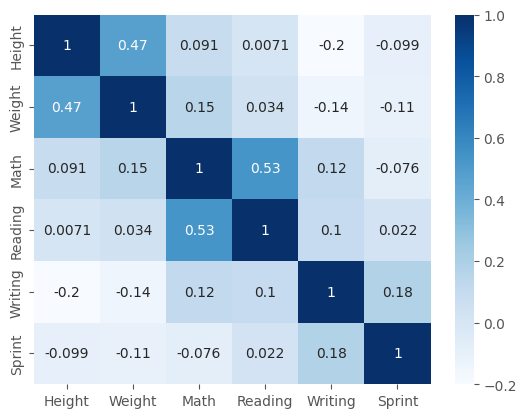

In [11]:
# Heat Maps
subset = data[['Height', 'Weight', 'Math', 'Reading', 'Writing', 'Sprint']]
subset
sns.heatmap(subset.corr(), annot=True, cmap = 'Blues') # Reds, Greens
# corr() The correlation matrix shows the correlation coefficients between each pair of variables in the subset.
# annot=True: This argument instructs the function to display the correlation values as text annotations within each cell of the heatmap.


<Axes: xlabel='Athlete', ylabel='Reading'>

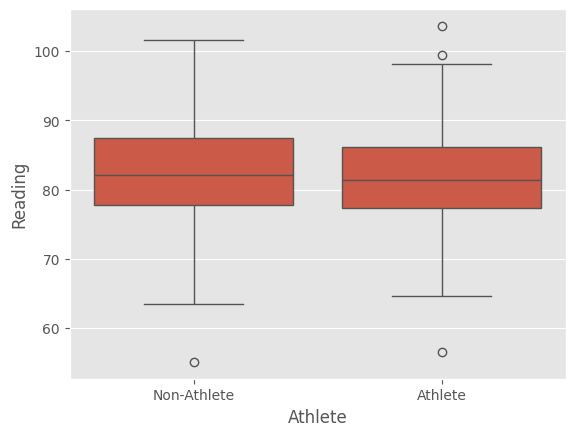

In [12]:
# box plots are useful for checking several key aspects of your data: 
# Outliers - are values that fall significantly outside the typical range of the data.
sns.boxplot(y = 'Reading', data = data, x = 'Athlete')
# data['Reading'].describe()
# IQR = 1.7
# Max = 7.3+1.5*1.7  =9.85

<Axes: xlabel='Math', ylabel='Reading'>

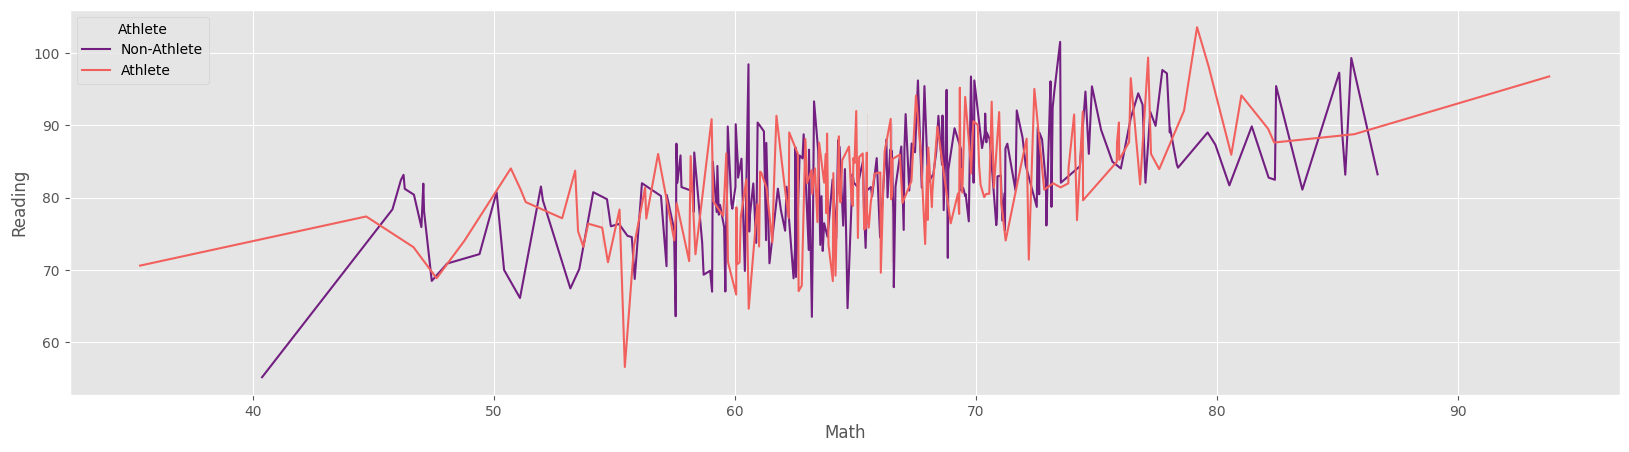

In [13]:
plt.figure(figsize=(20, 5))
sns.lineplot(x ='Math', y ='Reading', data = data, palette= 'magma', hue ='Athlete')